# **Tarefa 1 - Pré-processamento**

####**Dicas:**

- Tutorial para iniciantes em Python: https://www.datacamp.com/cheat-sheet/getting-started-with-python-cheat-sheet

- Documentação do pandas: https://colab.research.google.com/drive/1a4sbKG7jOJGn4oeonQPA8XjJm7OYgcdX

- Documentação do scikit-learn: https://scikit-learn.org/stable/

- Documentação do matplotlib: https://matplotlib.org/stable/index.html

- Documentação do seaborn: https://seaborn.pydata.org/tutorial.html

---

### **Dataset:**

  Este conjunto de dados inclui informações para a estimativa dos níveis de obesidade em indivíduos dos países México, Peru e Colômbia, com base em seus hábitos alimentares e condição física. Os dados contêm 18 atributos e 2111 registros, que estão rotulados com a variável de classe **NObesity** (Nível de Obesidade), permitindo a classificação dos dados usando os valores **Normal Weight** e **Obesity**.
  
**Colunas:**

1. **Gender**

2. **Age**
3. **Height**
4. **Weight**
5. **family_history_with_overweight** → Algum membro da família já sofreu ou sofre de excesso de peso?
6. **FAVC** → Você come alimentos altamente calóricos com frequência?
7. **FCVC** → Você costuma comer vegetais nas suas refeições?
8. **NCP** → Quantas refeições principais você faz diariamente?
9. **CAEC** → Você come algo entre as refeições?
10. **SMOKE** → Você fuma?
11. **CH2O** → Quanto de água você bebe diariamente?
12. **SCC** → Você monitora as calorias que consome diariamente?
13. **FAF** → Com que frequência você pratica atividade física?
14. **TUE** → Quanto tempo você utiliza dispositivos tecnológicos como celular, videogames, televisão, computador e outros?
15. **CALC** → Com que frequência você consome álcool?
16. **MTRANS** → Qual meio de transporte você costuma usar?
17. **TW1** → Quantas calorias você consumiu na última refeição?
18. **NObeyesdad** → Nível de obesidade (alvo)



## **Importe os pacotes**

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder

## **Crie os datasets**
### **Crie um DataFrame a partir do arquivo de dados disponibilizados no EaD**

**Dicas:**
* Busque a função `read_csv()` da biblioteca **pandas**.

* Certifique-se que os arquivos a serem lidos estão carregados na sua sessão do Colab, ou em um drive previamente montado, e ajuste o comando para incluir todo o caminho até cada um dos arquivos a serem lidos.

In [173]:
df = pd.read_csv("dataset_obesity-2024_2.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,TW1
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal Weight,42.0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal Weight,42.0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal Weight,46.0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Normal Weight,54.0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Normal Weight,44.0


---
# **Pré-processamento**

Nesta sessão, você realizará o pré-processamento dos dados, preparando-os para uso no modelo de aprendizado de máquina.


## Dados faltantes

Identifique se existem dados faltantes.
Se houver, trate os dados faltantes substituindo-os pela média.

**Dicas:**
* Busque as funções `fillna()` e `mean()` da biblioteca pandas.



In [174]:
print(df.isna().sum())
# There's only empty values in the column height.

df['Height'] = df['Height'].fillna(df['Height'].mean())
print("Empty values remaining:", df['Height'].isna().sum())

Gender                              0
Age                                 0
Height                            100
Weight                              0
family_history_with_overweight      0
FAVC                                0
FCVC                                0
NCP                                 0
CAEC                                0
SMOKE                               0
CH2O                                0
SCC                                 0
FAF                                 0
TUE                                 0
CALC                                0
MTRANS                              0
NObeyesdad                          0
TW1                                 0
dtype: int64
Empty values remaining: 0


## Outliers ou Noises

Identifique os Outliers ou Noises. Se houver retire-os.

**Dicas:**
* Busque o comando `boxplot()` da biblioteca pandas para plotar o gráfico para facilitar a identicação de outliers.
* Pesquisa sobre o funcionamento do boxplot para encontrar o outliers ou noise.
* Para retirar os outliers lembre-se do método IQR
* Preste atenção nas colunas Age, Height, Weight

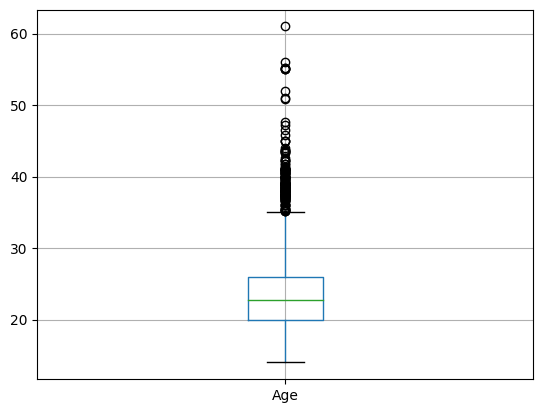

In [175]:
age = df[['Age']]
age.boxplot()
plt.show()

In [176]:
age = age['Age']
Q1 = age.quantile(0.25)
Q3 = age.quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Age'] < (Q3 + 1.5*IQR)) & (df['Age'] > (Q1 - 1.5*IQR))]

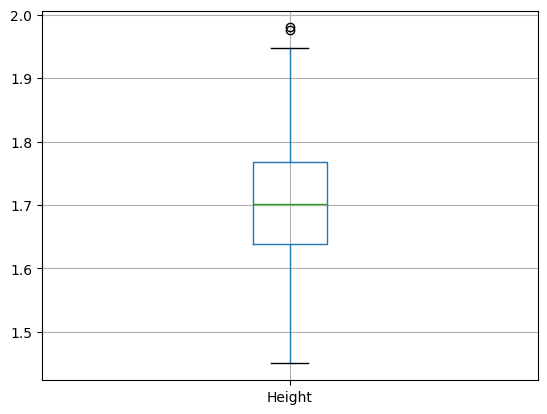

In [177]:
height = df[['Height']]
height.boxplot()
plt.show()

In [178]:
height = height['Height']
Q1 = height.quantile(0.25)
Q3 = height.quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Height'] < (Q3 + 1.5*IQR)) & (df['Height'] > (Q1 - 1.5*IQR))]

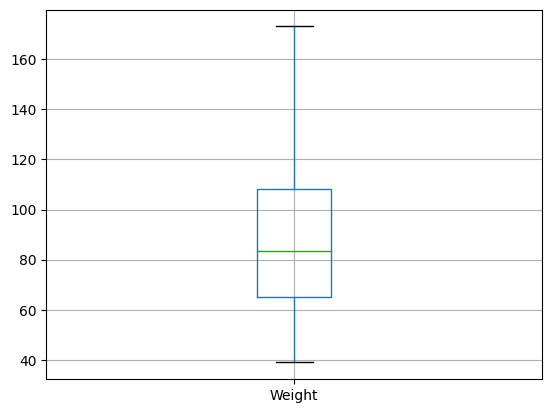

In [179]:
weight = df[['Weight']]
weight.boxplot()
plt.show()

In [180]:
weight = weight['Weight']
Q1 = weight.quantile(0.25)
Q3 = weight.quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Weight'] < (Q3 + 1.5*IQR)) & (df['Weight'] > (Q1 - 1.5*IQR))]

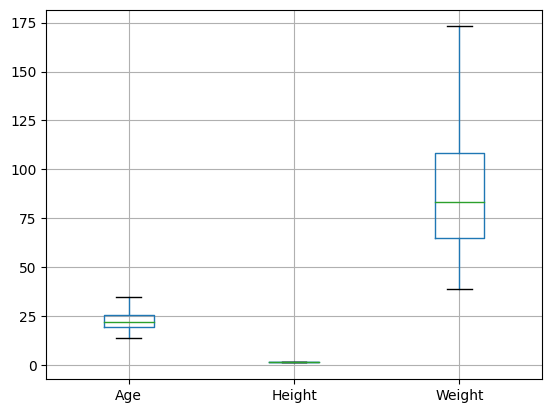

In [181]:
df[['Age','Height','Weight']].boxplot()
plt.show()

## Análise e transforme os atributos categóricos

Analise os dados categóricos do dataset trate eles de acordo com seu tipo ( Ordinais ou Nominais )

**Dica**
* Busque os comandos `OneHotEncoder()` e `LabelEncoder()`.

In [182]:
frequency = ['no', 'Sometimes', 'Frequently', 'Always']
NObeyesdad = ['Normal Weight', 'Obesity']
oeFreq = OrdinalEncoder(categories = [frequency])
oeObe = OrdinalEncoder(categories = [NObeyesdad])
df['CAEC'] = oeFreq.fit_transform(df[['CAEC']])
df['CALC'] = oeFreq.fit_transform(df[['CALC']])
df['NObeyesdad'] = oeObe.fit_transform(df[['NObeyesdad']])

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['family_history_with_overweight'] = le.fit_transform(df['family_history_with_overweight'])
df['FAVC'] = le.fit_transform(df['FAVC'])
df['SMOKE'] = le.fit_transform(df['SMOKE'])
df['SCC'] = le.fit_transform(df['SCC'])
df['MTRANS'] = le.fit_transform(df['MTRANS'])
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,TW1
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1.0,0,2.0,0,0.0,1.0,0.0,3,0.0,42.0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1.0,1,3.0,1,3.0,0.0,1.0,3,0.0,42.0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1.0,0,2.0,0,2.0,1.0,2.0,3,0.0,46.0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1.0,0,2.0,0,2.0,0.0,2.0,4,0.0,54.0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1.0,0,2.0,0,0.0,0.0,1.0,3,0.0,44.0


## Grau de Correlação

Há redundância entre os atributos? Algum atributo deve ser retirado? Existe alguma correlação interessante? Consegue pensar em um motivo para sua existência? Explique.

**Dica:**

* Verifique a relação entre os atributos através de um gráfico de correlação
( **Correlation Matrix** )
* Busque pela função `heatmap()` da biblioteca seaborn
* Busque pela função `corr()` da biblioteca pandas

###  Agora retire as colunas que tenham um alto grau de correlação com outra do dataset.


## Normalizar os dados numéricos

Aplique a normalização dos dados numéricos utilizando o método *min-max*.

**Dica:**
* Busque o método `MinMaxScaler()` da biblioteca sklearn.


In [183]:
scaler = MinMaxScaler()

cols = df.select_dtypes(include='number').columns
df[cols] = scaler.fit_transform(df[cols])

---
# **KNN**

Nesta sessão, você implementará o modelo KNN para realizar a classificação com base nos dados pré-processados.

## **Treinamento do modelo KNN**

**Dica:**
* Na biblioteca sklearn o KNN é chamado de `KNeighborsClassifier()`.


## Faça uma Inferência no seu modelo
Agora, com um dado fictício, teste se seu modelo conseguirá predizer
corretamente se esse dado representa um caso de obesidade ou não.

**Dicas:**
* Crie uma array para o dado fictício
* Ao criar o dado fictício (por exemplo Peso: 81kg) lembre-se que o modelo que treinou está com os dados normalizados então normalize o dado fictício antes de inferí-lo no modelo